In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# TL;DR

* a distribuicao do ouptut e disbalanceada, com poucas observacoes pra os vinhos boms e ruims
* existe uns outliers e tive que tratar o alcohol pois umas observacoes eram quebradas
* O tipo do vinho parece ser correlado com a maioria das variavies continuas e entao om a qualidade
* A maioria das variaveis quebrada por tipo parece ser correlada com o output
* A correlacao nao parece ser stritamente linear
* A variance nao maioria dos casos nao e constante

# DATASET

In [3]:
dt = pd.read_csv('winequality.csv', sep=";");
dt.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
type,6497,2,White,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,6497,NaN,NaN,NaN,7.21531,1.29643,3.8,6.4,7,7.7,15.9
volatile acidity,6497,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric acid,6497,NaN,NaN,NaN,0.318633,0.145318,0,0.25,0.31,0.39,1.66
residual sugar,6497,NaN,NaN,NaN,5.44324,4.7578,0.6,1.8,3,8.1,65.8
chlorides,6497,NaN,NaN,NaN,0.0560339,0.0350336,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497,NaN,NaN,NaN,30.5253,17.7494,1,17,29,41,289
total sulfur dioxide,6497,NaN,NaN,NaN,115.745,56.5219,6,77,118,156,440
density,6497,NaN,NaN,NaN,1.71088,7.63609,0.98711,0.99234,0.99489,0.99699,103.898
pH,6497,NaN,NaN,NaN,3.2185,0.160787,2.72,3.11,3.21,3.32,4.01


In [3]:
print(f'Catgorical variables: {dt.select_dtypes(include = "object").columns.tolist()}')
print(f'Continuous variables: {dt.select_dtypes(exclude = "object").columns.tolist()}')

Catgorical variables: ['type', 'alcohol']
Continuous variables: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']


In [22]:
dt.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# DISCOVERY

## Continuous vars

In [27]:
dt[['quality']].describe().T

,count,mean,std,min,25%,50%,75%,max
quality,6497.0,5.818378,0.873255,3.0,5.0,6.0,6.0,9.0


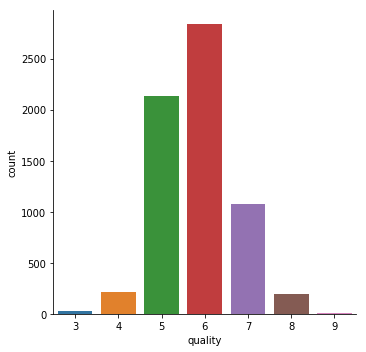

In [4]:
sns.catplot(data = dt, x='quality', kind = 'count')

### SULPHATES

In [26]:
dt[['sulphates']].describe().T

,count,mean,std,min,25%,50%,75%,max
sulphates,6497.0,0.531268,0.148806,0.22,0.43,0.51,0.6,2.0


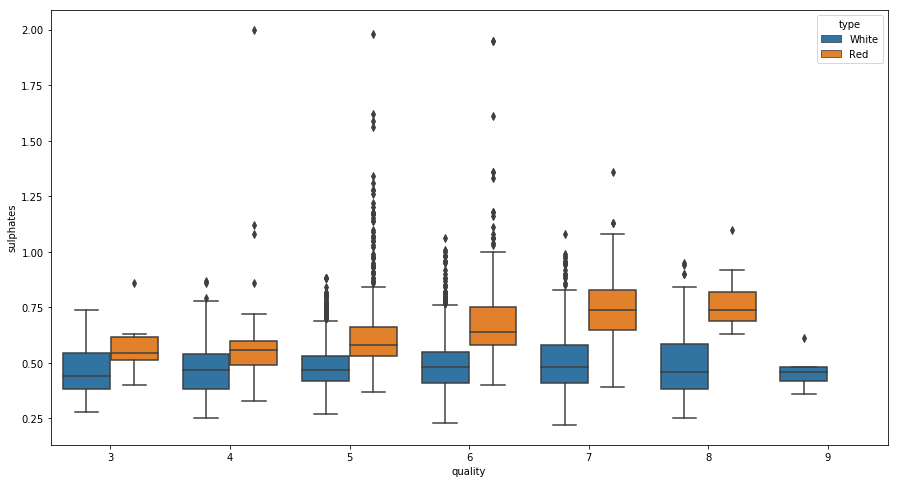

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'sulphates', hue = 'type')

### PH

In [28]:
dt[['pH']].describe().T

,count,mean,std,min,25%,50%,75%,max
pH,6497.0,3.218501,0.160787,2.72,3.11,3.21,3.32,4.01


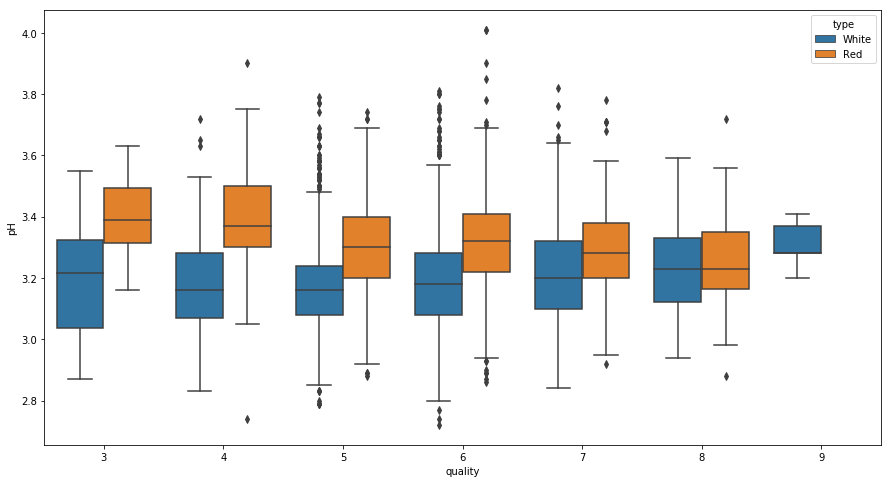

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'pH', hue = 'type')

### DENSITY

In [29]:
dt[['density']].describe().T

,count,mean,std,min,25%,50%,75%,max
density,6497.0,1.710882,7.636088,0.98711,0.99234,0.99489,0.99699,103.898


Density cant be >1. We need to filter these values

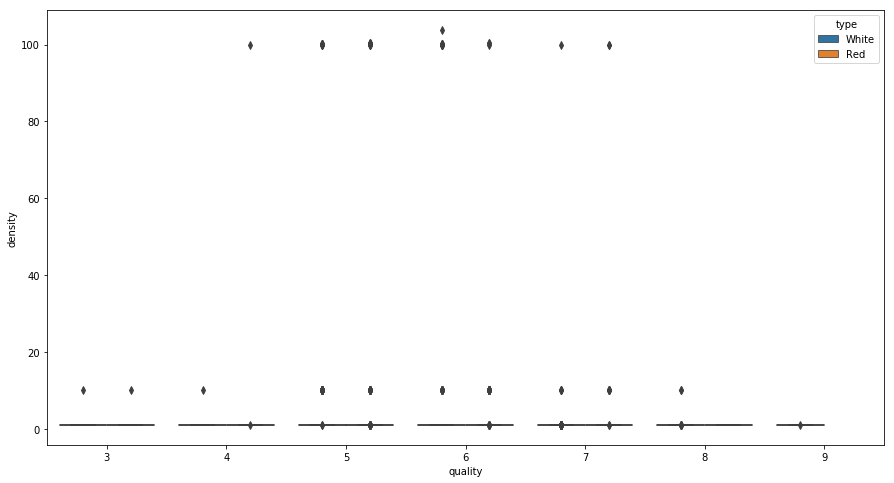

In [4]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'density', hue = 'type')

### TOTAL SULFURE DIOXIDE

In [32]:
dt[['total sulfur dioxide']].describe().T

,count,mean,std,min,25%,50%,75%,max
total sulfur dioxide,6497.0,115.744574,56.521855,6.0,77.0,118.0,156.0,440.0


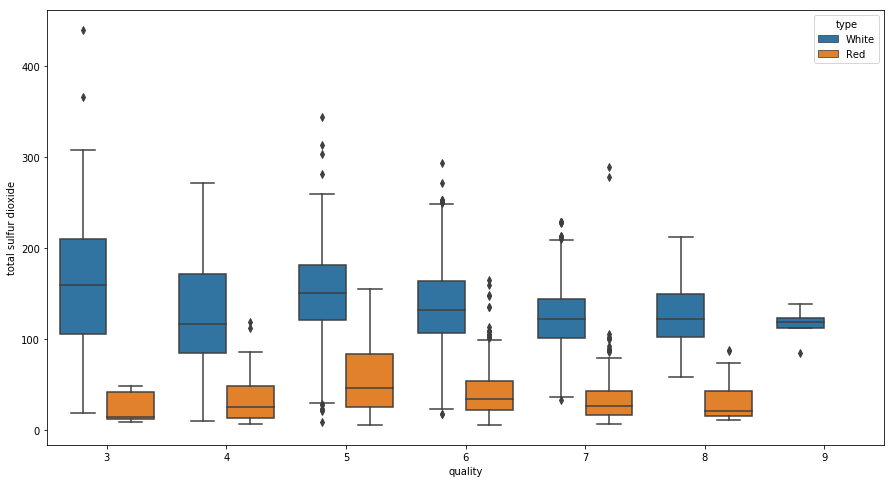

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'total sulfur dioxide', hue = 'type')

### FREE SULFUR DIOXIDE

In [33]:
dt[['free sulfur dioxide']].describe().T

,count,mean,std,min,25%,50%,75%,max
free sulfur dioxide,6497.0,30.525319,17.7494,1.0,17.0,29.0,41.0,289.0


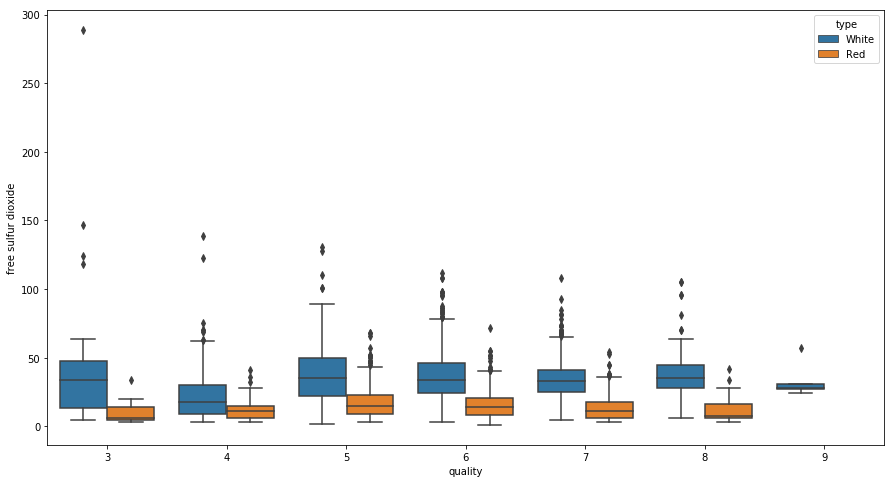

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'free sulfur dioxide', hue = 'type')

### FIXED ACIDITY

* VARIANCE UNIFORM
* LINEAR

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


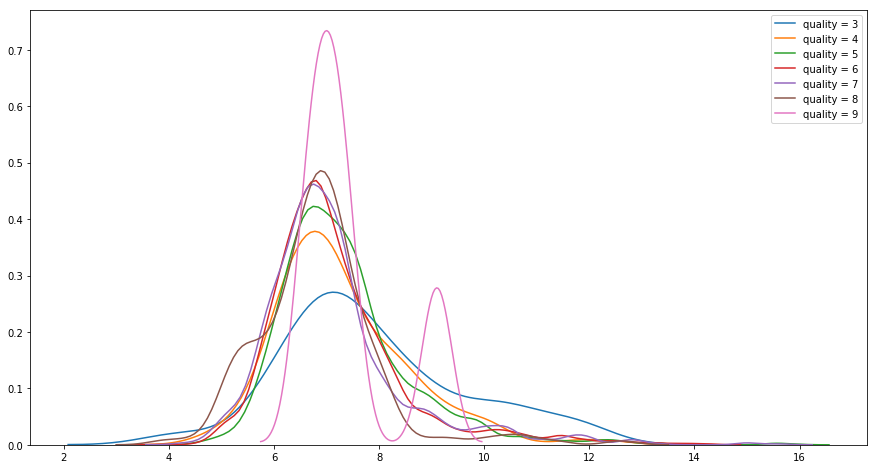

In [10]:
quality = dt.quality.unique()
quality.sort()
plt.figure(figsize=(15,8))
for i in quality:
    sns.kdeplot(dt[dt.quality == i]['fixed acidity'], label = f'quality = {i}')

In [34]:
dt[['fixed acidity']].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.8,6.4,7.0,7.7,15.9


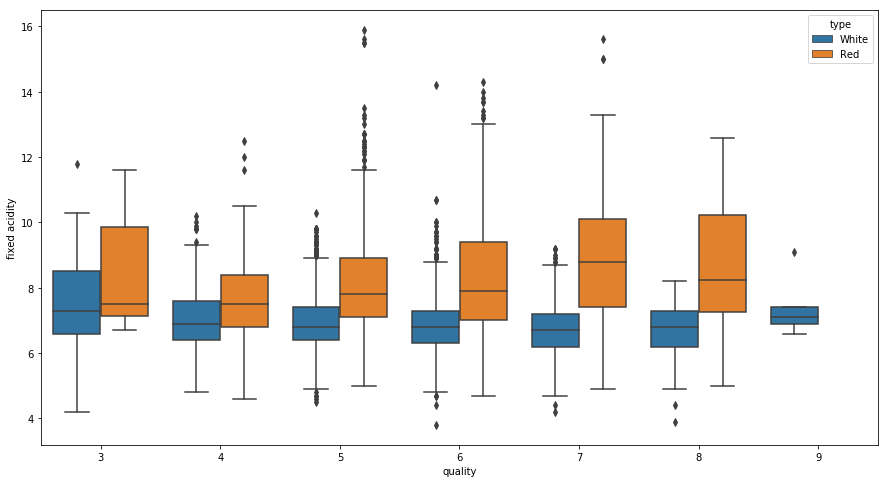

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'fixed acidity', hue = 'type')

### VOLATILE ACIDITY

* HIGH CORR VAR W/ QUALITY
* LOW LIN

In [35]:
dt[['volatile acidity']].describe().T

,count,mean,std,min,25%,50%,75%,max
volatile acidity,6497.0,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58


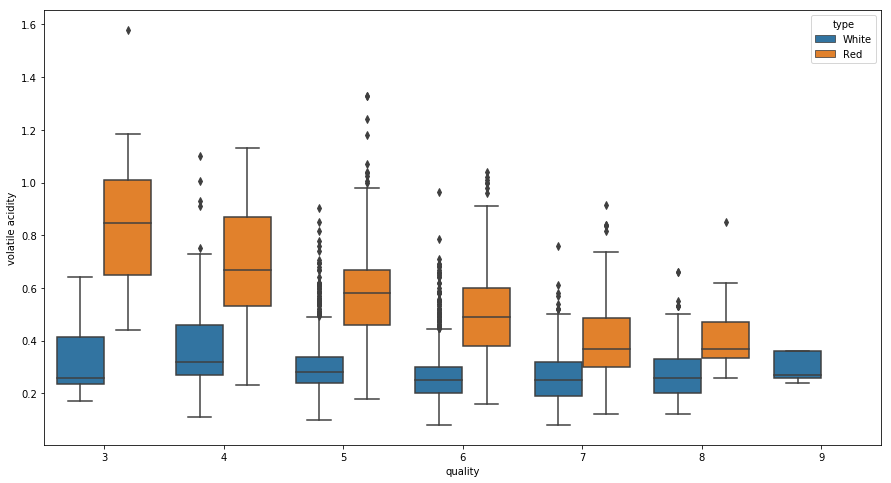

In [51]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'volatile acidity', hue = 'type')

### CITRIC ACID
* LOW CORR VAR W/ QUALITY
* LOW LIN

In [36]:
dt[['citric acid']].describe().T

,count,mean,std,min,25%,50%,75%,max
citric acid,6497.0,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66


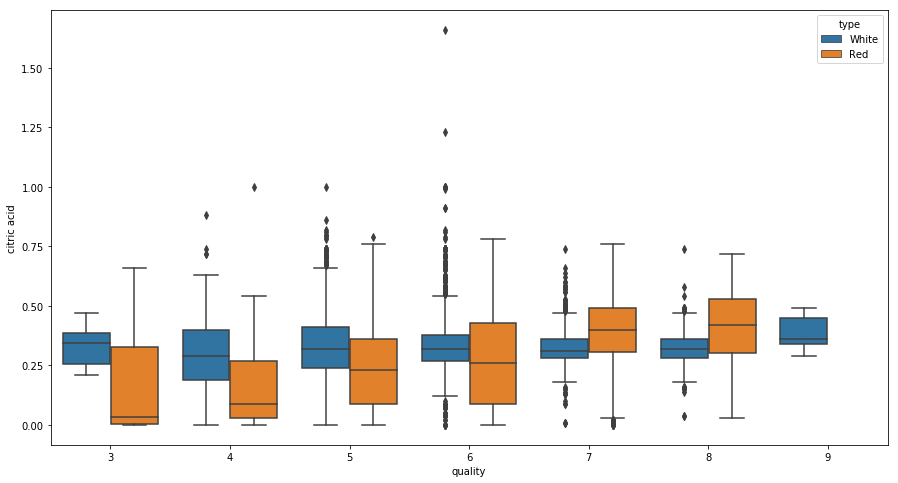

In [52]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'citric acid', hue = 'type')

### RESIDUAL SUGAR
* UNI VAR
* LOW LINEARITY

In [38]:
dt[['residual sugar']].describe().T

,count,mean,std,min,25%,50%,75%,max
residual sugar,6497.0,5.443235,4.757804,0.6,1.8,3.0,8.1,65.8


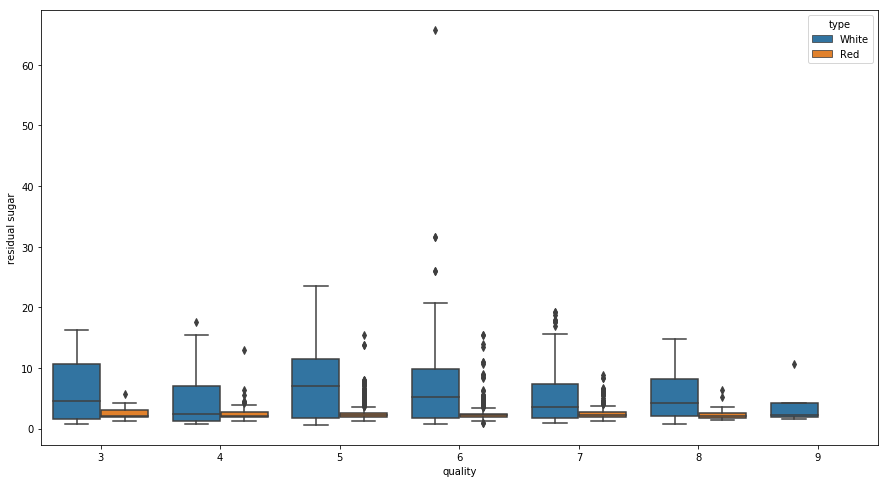

In [53]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'residual sugar', hue = 'type')

### CHLORIDES
* LOW CORR VAR W/ QUALITY
* LOW LIN

In [39]:
dt[['chlorides']].describe().T

,count,mean,std,min,25%,50%,75%,max
chlorides,6497.0,0.056034,0.035034,0.009,0.038,0.047,0.065,0.611


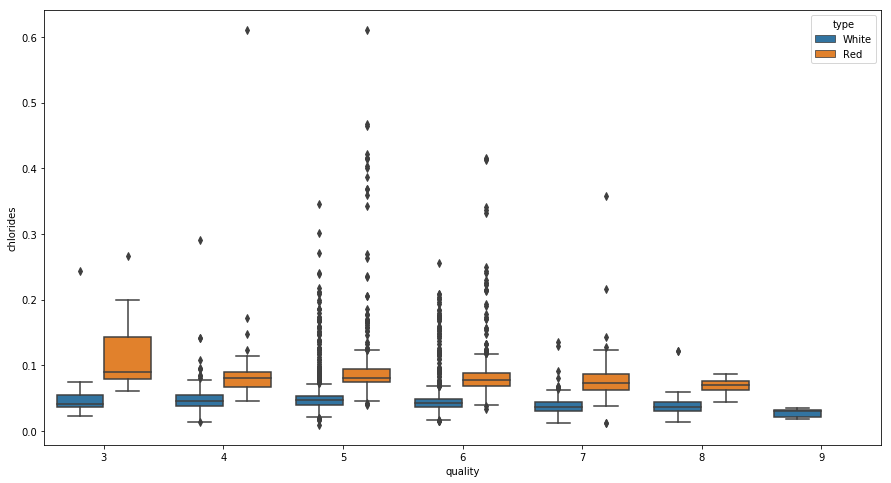

In [54]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'chlorides', hue = 'type')

### ALCOHOL

In [18]:
dt.loc[dt.alcohol.str.match('[0-9]+\.+[0-9]+\.+'),'alcohol'] = dt.loc[dt.alcohol.str.match('[0-9]+\.+[0-9]+\.+'),:]['alcohol'].apply(lambda x: x.split('.')[0]).map(lambda x: int(x)/10)
dt.alcohol = dt['alcohol'].map(float)

In [40]:
dt[['alcohol']].describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,6497.0,10.597477,3.214091,8.0,9.5,10.3,11.3,97.3


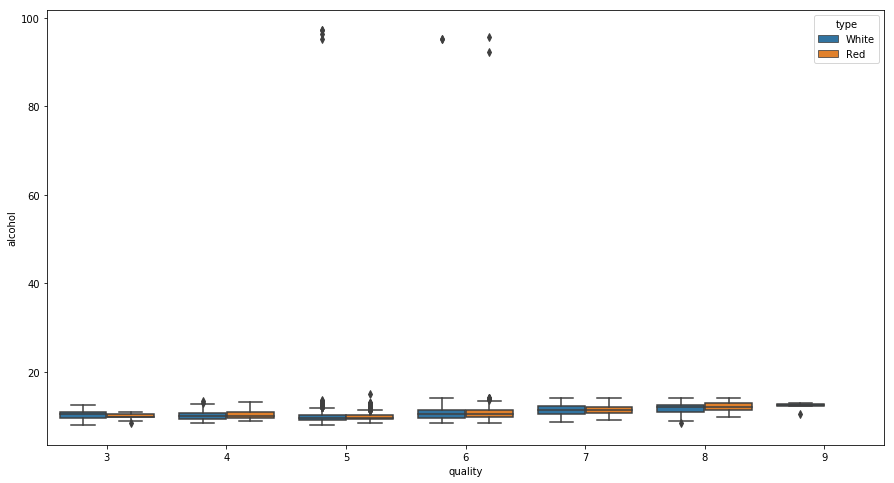

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dt, x = 'quality', y = 'alcohol', hue = 'type')

## Categorical vars

### TYPE
* UNI VAR
* CONST

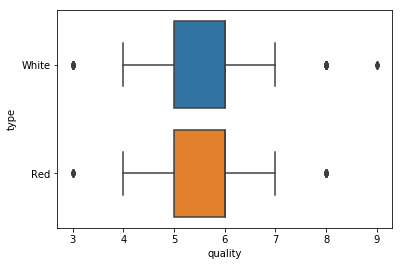

In [16]:
sns.boxplot( x=dt["quality"], y=dt["type"], orient = 'h')